Visualising high dimensional spaces using Bayesian GPLVM
--
*Alexis Boukouvalas, June 2016*

 - Sample from a periodic kernel
 - Visualise the space using Baysian GPLVM

In [52]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.style.use('ggplot')
%matplotlib inline
import GPflow
import numpy as np
import tensorflow as tf
np.random.seed(0)

In [53]:
Q = 2 # latent dimension
D = 5 # true dimension
N = 10
lengthscale = 1.5
variance = 1.3
rng = np.random.RandomState(1)
X_data1 = rng.multivariate_normal(np.zeros(D), 0.1*np.eye(D), N)
X_data2 = rng.multivariate_normal(2*np.ones(D), 1*np.eye(D), N)
X_data  = np.vstack([X_data1,X_data2])
idx = np.vstack([np.ones((N,1)), 2*np.ones((N,1))])
kernel = GPflow.kernels.RBF(Q, variance=variance, lengthscales=lengthscale)

In [54]:
K = kernel.compute_K(X_data, X_data)

L = np.linalg.cholesky(K + np.eye(K.shape[0])*0.01)
Y = L.dot(np.random.randn(L.shape[0],D))

In [55]:
Y.shape

(20, 5)

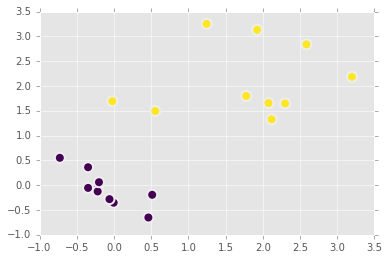

In [56]:
plt.scatter(X_data[:,0], X_data[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)

(20, 2)


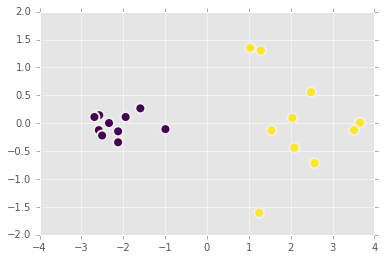

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=Q)
XPCA = pca.fit_transform(Y)
print XPCA.shape
plt.scatter(XPCA[:,0], XPCA[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)

In [58]:
from GPflow import gplvm

[[-0.447  1.225]
 [ 0.403  0.594]
 [-1.095  0.169]
 [ 0.741 -0.954]
 [-0.266  0.033]
 [-1.373  0.315]
 [ 0.846 -0.86 ]
 [ 0.351 -1.312]
 [-0.039 -1.616]
 [ 1.121  0.409]
 [-0.025 -0.775]
 [ 1.274  1.967]
 [-1.858  1.236]
 [ 1.628  0.338]
 [-1.199  0.863]
 [-0.181 -0.604]
 [-1.23   0.551]
 [ 0.793 -0.624]
 [ 0.521 -1.144]
 [ 0.802  0.047]]
compiling tensorflow function...
done
optimization terminated, setting model state
[[-1.914 -5.875]
 [-2.001 -3.434]
 [-2.106 -6.051]
 [-1.895 -5.223]
 [-2.62  -4.301]
 [-2.325 -5.504]
 [-2.198 -5.19 ]
 [-2.178 -5.905]
 [-1.902 -5.802]
 [-2.326 -4.877]
 [-0.715  1.258]
 [-0.447  1.97 ]
 [-1.455  3.765]
 [-1.041  3.51 ]
 [-3.452 -0.084]
 [-3.462  0.306]
 [-2.296  2.036]
 [-1.304  0.455]
 [ 0.523 -0.214]
 [-1.555  1.269]]


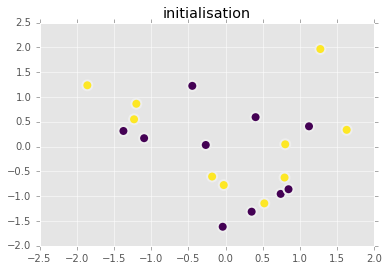

In [59]:
XInitGPLVM = rng.multivariate_normal(np.zeros(Q), np.eye(Q), 2*N)

np.set_printoptions(3)
print XInitGPLVM
fig=plt.figure
plt.scatter(XInitGPLVM[:,0], XInitGPLVM[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)
plt.title('initialisation')

# You could implement a standard GPLVM, and show that it recovers PCA when the kernel is linear
m = GPflow.gplvm.GPLVM(Y=Y, Q=Q, kern=GPflow.kernels.Linear(2), XInit=XInitGPLVM)

m.optimize()

print m.X.value

In [74]:
np.set_printoptions(precision=2)
X=np.vstack([m.X.value[:,1], -m.X.value[:,0]]).T
XT= (X - X.min(0)) / (X.max(0) - X.min(0))
XPCAT= (XPCA - XPCA.min(0)) / (XPCA.max(0) - XPCA.min(0))

True


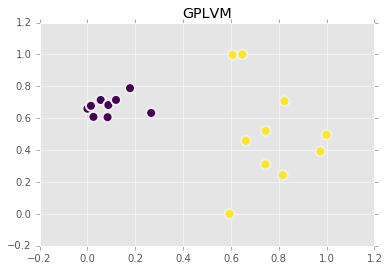

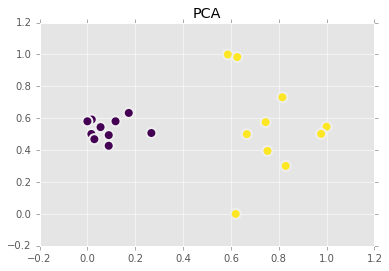

In [87]:
fig=plt.figure()
plt.scatter(XT[:,0], XT[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)
plt.title('GPLVM')
fig=plt.figure()
plt.scatter(XPCAT[:,0], XPCAT[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)
plt.title('PCA')
print np.allclose(XT,XPCAT,atol=0.2)

In [17]:
print np.allclose(m.X.value, XPCA)
print np.allclose(m.X.value[:,[1,0]], XPCA)

False
False


In [48]:
# You could set the variance of the BGPLVM to zero and show that it's the same as the GPLVM
# BGPLVM with variance to 0 is same as GPLVM
N = 10  # number of data points
D = 1  # latent dimensions
M = 5  # inducings points
R = 2  # data dimension
rng = np.random.RandomState(1)
Y = rng.randn(N,R)
Z = rng.rand(M,D)
XInit = rng.rand(N, D)

m = GPflow.gplvm.BayesianGPLVM(X_mean = XInit, 
            X_var=np.zeros((N,D)), Y=Y, kern=GPflow.kernels.RBF(D), Z=Z) # use 0 variance
m.kern.fixed = True
m.X_var.fixed = True
m.optimize()
mGPLVM = GPflow.gplvm.GPLVM(Y=Y, Q=D, kern=GPflow.kernels.RBF(D), XInit=XInit)
mGPLVM.kern.fixed = True
mGPLVM.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


      fun: 13.58894872581009
 hess_inv: <11x11 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.086e-04,  -8.101e-05,   8.200e-05,  -3.980e-06,   7.172e-05,
        -2.383e-06,  -9.276e-05,  -1.919e-04,   1.493e-04,  -3.962e-05,
        -1.404e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 26
      nit: 19
   status: 0
  success: True
        x: array([ 0.91 , -1.713,  1.86 ,  0.966, -1.103,  1.528, -1.286,  1.119,
       -1.514, -0.767, -3.091])

In [49]:
np.set_printoptions(3)
print XInit
print m.X_mean.value
print mGPLVM.X.value
print np.allclose(m.X_mean.value, mGPLVM.X.value)


[[ 0.91 ]
 [-1.713]
 [ 1.86 ]
 [ 0.966]
 [-1.103]
 [ 1.528]
 [-1.286]
 [ 1.119]
 [-1.514]
 [-0.767]]
[[ 0.91 ]
 [-1.713]
 [ 1.86 ]
 [ 0.966]
 [-1.103]
 [ 1.528]
 [-1.286]
 [ 1.119]
 [-1.514]
 [-0.767]]
[[ 0.91 ]
 [-1.713]
 [ 1.86 ]
 [ 0.966]
 [-1.103]
 [ 1.528]
 [-1.286]
 [ 1.119]
 [-1.514]
 [-0.767]]
True


In [ ]:
# Bayesian GPLVM model
from GPflow import gplvm

# Create 49 inducings points on a grid
fGrid = False
if(fGrid):
    Z1, Z2 = np.mgrid[X_data.min():X_data.max():7j, X_data.min():X_data.max():7j]
    Z = np.vstack([Z1.ravel(), Z2.ravel()]).T
else:
    Z = rng.multivariate_normal(np.zeros(Q), np.eye(Q), 10)

plt.scatter(Z[:,0], Z[:,1], 100, lw=2, cmap=plt.cm.viridis)

print Z.shape

# just optimize X
kernel.variance.fixed = True
kernel.lengthscales.fixed = True

# m = GPflow.gplvm.BayesianGPLVM(X_mean = np.zeros((2*N,Q)), 
#             X_var=np.ones((2*N,Q)), Y=Y, kern=kernel, Z=Z)

m = GPflow.gplvm.BayesianGPLVM(X_mean = XPCA.copy(),
                X_var=2*np.ones((2*N,Q)), Y=Y, kern=kernel, Z=Z)
m.likelihood.variance = 0.01
m.likelihood.fixed = True
m.X_var = 0.01


m.optimize(max_iters = 500, display=1)

In [ ]:
Xinf = m.X_mean.value
plt.scatter(Xinf[:,0], Xinf[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)

In [ ]:
plt.scatter(Xinit[:,0], Xinit[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)

In [ ]:
plt.scatter(X_data[:,0], X_data[:,1], 100, idx, lw=2, cmap=plt.cm.viridis)

In [ ]:
# Has GPLVM done anything or is it stuck in initialisation?
np.allclose(Xinf,Xinit)

In [ ]:
print m.X_var